<a href="https://colab.research.google.com/github/jcdumlao14/CloudcreditsTechnologies-Data-Science-Internship/blob/main/Project_4_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 4: Sales Forecasting**

## **📝 Description:**
- *Develop a time series model to forecast future sales based on historical sales data. Experiment with different forecasting techniques like ARIMA, exponential smoothing, and machine learning models. Visualize the forecasted sales and compare model performance.*


## **🔧 Project Structure:**

1. **🧠 Define the Problem:** Understand the objective and type of problem (classification, regression, etc.).
2. **🗂️ Collect and Prepare Data:** Obtain the dataset, handle missing values, and preprocess data.
3. **📊 Exploratory Data Analysis (EDA):** Visualize data to understand patterns and correlations.
4. **📐 Feature Engineering:** Select and create relevant features.
5. **🔀 Split the Data:** Divide the dataset into training and testing sets.
6. **🤖 Choose a Model:** Select a suitable machine learning algorithm.
7. **🏋️ Train the Model:** Train the model using the training set.
8. **📈 Evaluate the Model:** Use appropriate metrics to evaluate the model on the test set.
9. **🔧 Improve the Model:** Tune hyperparameters, try different algorithms, or enhance features.
10. **🚀 Deploy the Model (optional):** Create an application or API to make predictions using the trained model.




## **🧪 I'll experiment with:**
- **ARIMA**
- **Exponential Smoothing(Hot-Winters)**
- **Random Forest Regressor**
- **XGBoost Regressor**
- **LSTM (Optional for deep learning)**

## **Data Source: [Kaggle/Store Sales Forecasting Dataset](https://www.kaggle.com/datasets/tanayatipre/store-sales-forecasting-dataset/data?select=stores_sales_forecasting.csv)**

#  **1. 🧠 Define the Problem**
- Businesses want to know how much they will sell in the future. Making accurate sales forecasts helps with planning, inventory management, and meeting customer demand.

## **Objective:**
- Predict future sales based on past sales data using time series forecasting models and machine learning.

## **Type:**
- Regression Problem - because the goal is to predict a continuous numeric value (sales amount), not categories.

<h2 style='border:0; border-radius: 15px; font-weight: 800; color:#9b006e; font-size:280%'>
  <center>Sales Forecasting Dataset Description</center>
</h2>

<table border="1" style="border-collapse: collapse; width: 100%;">
  <thead style="background-color: #f9f9f9;">
    <tr>
      <th>S.No</th>
      <th>Attribute</th>
      <th>Definition</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>1</td><td><b>🆔 Row ID</b></td><td>Unique identifier for each entry.</td></tr>
    <tr><td>2</td><td><b>📦 Order ID</b></td><td>Unique order identifier.</td></tr>
    <tr><td>3</td><td><b>📅 Order Date</b></td><td>Date when the order was placed.</td></tr>
    <tr><td>4</td><td><b>🚚 Ship Date</b></td><td>Date when the order was shipped.</td></tr>
    <tr><td>5</td><td><b>📦 Ship Mode</b></td><td>Shipping method used.</td></tr>
    <tr><td>6</td><td><b>👤 Customer ID</b></td><td>Unique identifier for each customer.</td></tr>
    <tr><td>7</td><td><b>🏷 Customer Name</b></td><td>Name of the customer.</td></tr>
    <tr><td>8</td><td><b>🎯 Segment</b></td><td>Market segment (e.g., Consumer, Corporate).</td></tr>
    <tr><td>9</td><td><b>🌎 Country</b></td><td>Country where the order was placed.</td></tr>
    <tr><td>10</td><td><b>🏙 City</b></td><td>City where the order was placed.</td></tr>
    <tr><td>11</td><td><b>🏛 State</b></td><td>State where the order was placed.</td></tr>
    <tr><td>12</td><td><b>📮 Postal Code</b></td><td>Postal code of the customer.</td></tr>
    <tr><td>13</td><td><b>🌍 Region</b></td><td>Geographic region.</td></tr>
    <tr><td>14</td><td><b>🔢 Product ID</b></td><td>Unique identifier for the product.</td></tr>
    <tr><td>15</td><td><b>🛍 Category</b></td><td>Category of the product (e.g., Furniture, Office Supplies).</td></tr>
    <tr><td>16</td><td><b>🗂 Sub-Category</b></td><td>Sub-category of the product.</td></tr>
    <tr><td>17</td><td><b>🏷 Product Name</b></td><td>Name of the product.</td></tr>
    <tr><td>18</td><td><b>💰 Sales</b></td><td>Total sales amount.</td></tr>
    <tr><td>19</td><td><b>📦 Quantity</b></td><td>Quantity of items purchased.</td></tr>
    <tr><td>20</td><td><b>🎟 Discount</b></td><td>Discount applied.</td></tr>
    <tr><td>21</td><td><b>💸 Profit</b></td><td>Profit generated from the sale.</td></tr>
  </tbody>
</table>


# **Import Libraries**
   - First, you bring in all the necessary tools (like pandas, numpy, etc.) that will help me work with the data and build the models.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA


# **2. 🗂️Collect and Prepare Data**

## **📥 Read the CSV Files**

- Next, I load the sales data from a file (CSV) into a table-like structure called a DataFrame, which makes it easier to work with.

In [ ]:
df = pd.read_csv('/content/stores_sales_forecasting.csv', encoding='latin1')

In [ ]:
df.head(3).style.background_gradient(cmap='Paired_r')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960000,2,0.000000,41.913600
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.940000,3,0.000000,219.582000
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577500,5,0.450000,-383.031000


In [ ]:
df.tail(3).style.background_gradient(cmap='Accent_r')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980000,1,0.000000,22.354800
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248000,3,0.200000,4.102800
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Carpets,91.960000,2,0.000000,15.633200


In [ ]:
df.describe().style.background_gradient(cmap='GnBu')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


## **🧹 Data Cleaning and Preprocessing**
- Group all the sales by each order date and make it become a new table, with date and sales columns.
- Sort the table from the oldest date to the newest.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [ ]:
df = df.drop_duplicates()
df.head(3).style.background_gradient(cmap='CMRmap')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960000,2,0.000000,41.913600
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.940000,3,0.000000,219.582000
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577500,5,0.450000,-383.031000


In [ ]:
df.City.value_counts()

,count
City,
New York City,192
Los Angeles,154
Philadelphia,111
San Francisco,102
Seattle,97
...,...
Mansfield,1
Hillsboro,1
Bryan,1


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
df_sales.columns = ['Date', 'Sales']
df_sales = df_sales.sort_values('Date')

# **3. 📊 Exploratory Data Analysis (EDA)**
- In this step involves understanding the data through visualizations and summary statistics.



## **3.1. Total Sales Over Time:**
- How sales change over time

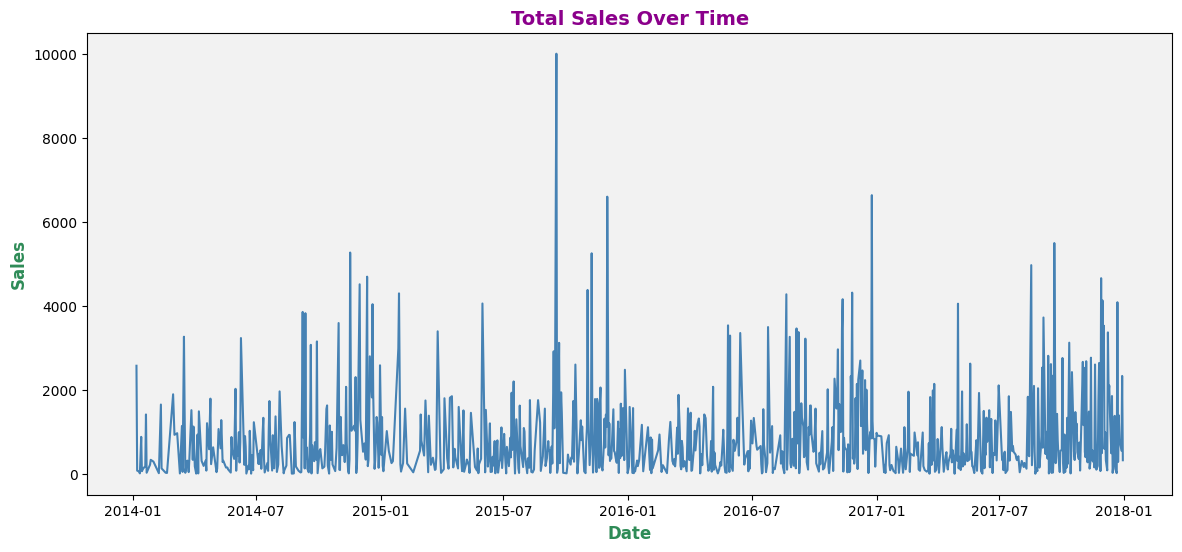

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df_sales['Date'], df_sales['Sales'], color='steelblue')
plt.title('Total Sales Over Time',fontsize = 14, fontweight = 'bold', color = 'darkmagenta')
plt.xlabel('Date',fontsize = 12, fontweight = 'bold', color = 'seagreen')
plt.ylabel('Sales',fontsize = 12, fontweight = 'bold', color = 'seagreen')
plt.gca().set_facecolor('#f2f2f2')
plt.grid(False)
plt.show()

## **3.2. Monthly Sales Trend:**
- Monthly sales trend over the years.

Monthly Sales:
       Month       Sales
0   2014-01   6242.5250
1   2014-02   1839.6580
2   2014-03  14573.9560
3   2014-04   7944.8370
4   2014-05   6912.7870
5   2014-06  13206.1256
6   2014-07  10821.0510
7   2014-08   7320.3465
8   2014-09  23816.4808
9   2014-10  12304.2470
10  2014-11  21564.8727
11  2014-12  30645.9665
12  2015-01  11739.9416
13  2015-02   3134.3740
14  2015-03  12499.7830
15  2015-04  10475.6985
16  2015-05   9374.9505
17  2015-06   7714.1790
18  2015-07  13674.4200
19  2015-08   9638.5922
20  2015-09  26273.0230
21  2015-10  12026.6235
22  2015-11  30880.8325
23  2015-12  23085.8192
24  2016-01   7622.7430
25  2016-02   3925.5510
26  2016-03  12801.0920
27  2016-04  13212.0900
28  2016-05  15119.8350
29  2016-06  13070.5720
30  2016-07  13068.5190
31  2016-08  12483.2323
32  2016-09  27262.8809
33  2016-10  11872.5770
34  2016-11  31783.6288
35  2016-12  36678.7150
36  2017-01   5964.0320
37  2017-02   6866.3374
38  2017-03  10893.4448
39  2017-04   9065.9581


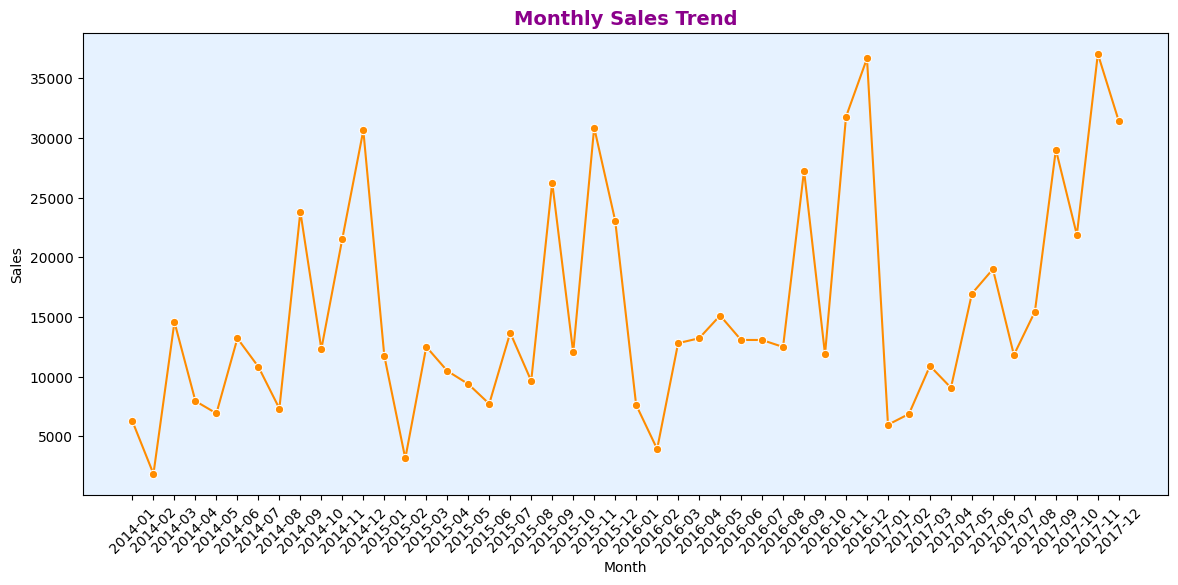

In [ ]:
# Monthly Sales Trend
df_sales['Month'] = df_sales['Date'].dt.to_period('M')
monthly_sales = df_sales.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
print("Monthly Sales:\n", monthly_sales)
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', color='darkorange')
plt.title('Monthly Sales Trend',fontsize = 14, fontweight = 'bold', color = 'darkmagenta')
plt.xticks(rotation=45)
plt.gca().set_facecolor('#e6f2ff')
plt.grid(False)
plt.show()

## **3.3. Yearly Sales Comparison:**
- How the total sales compare from year to year.

Yearly Sales:
    Year        Sales
0  2014  157192.8531
1  2015  170518.2370
2  2016  198901.4360
3  2017  215387.2692


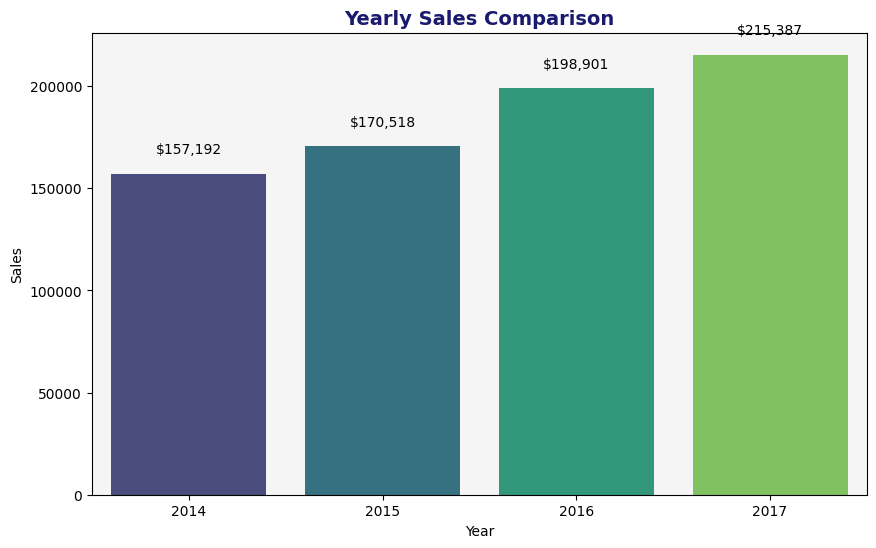

In [ ]:
# Yearly Sales Comparison
df_sales['Year'] = df_sales['Date'].dt.year
yearly_sales = df_sales.groupby('Year')['Sales'].sum().reset_index()
print("Yearly Sales:\n", yearly_sales)
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_sales, x='Year', y='Sales', palette='viridis')
for i, v in enumerate(yearly_sales['Sales']):
    plt.text(i, v + 10000, f"${int(v):,}", ha='center')
plt.title('Yearly Sales Comparison',fontsize = 14, fontweight = 'bold', color = 'midnightblue')
plt.gca().set_facecolor('#f5f5f5')
plt.grid(False)
plt.show()

## **3.4. Sales Distribution:**
- How sales are generally distributed (are there lots of small sales, or a few big ones?).

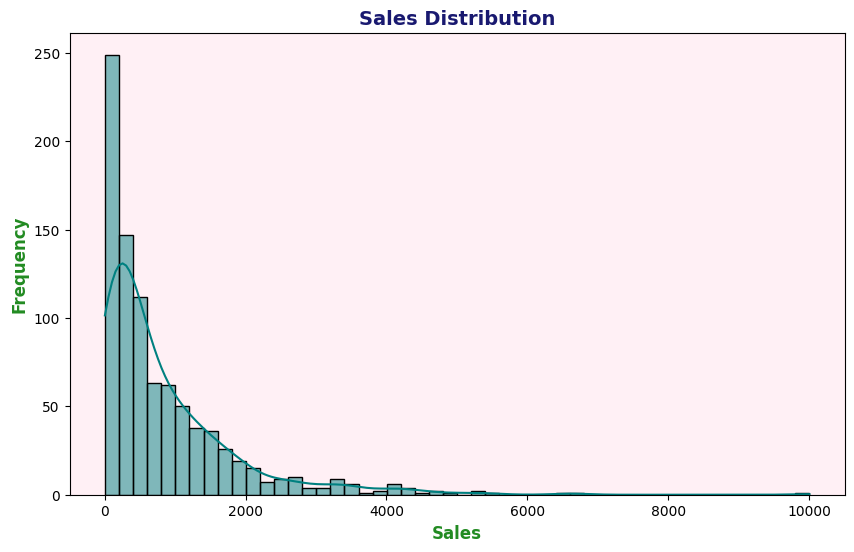

In [ ]:
# Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_sales['Sales'], bins=50, kde=True, color='teal')
plt.title('Sales Distribution',fontsize = 14, fontweight = 'bold', color = 'midnightblue')
plt.xlabel('Sales',fontsize = 12, fontweight = 'bold', color = 'forestgreen')
plt.ylabel('Frequency',fontsize = 12, fontweight = 'bold', color = 'forestgreen')
plt.gca().set_facecolor('#fff0f5')
plt.grid(False)
plt.show()

## **3.5. Monthly Seasonality in Sales:**
- If there are certain months where sales are higher or lower.

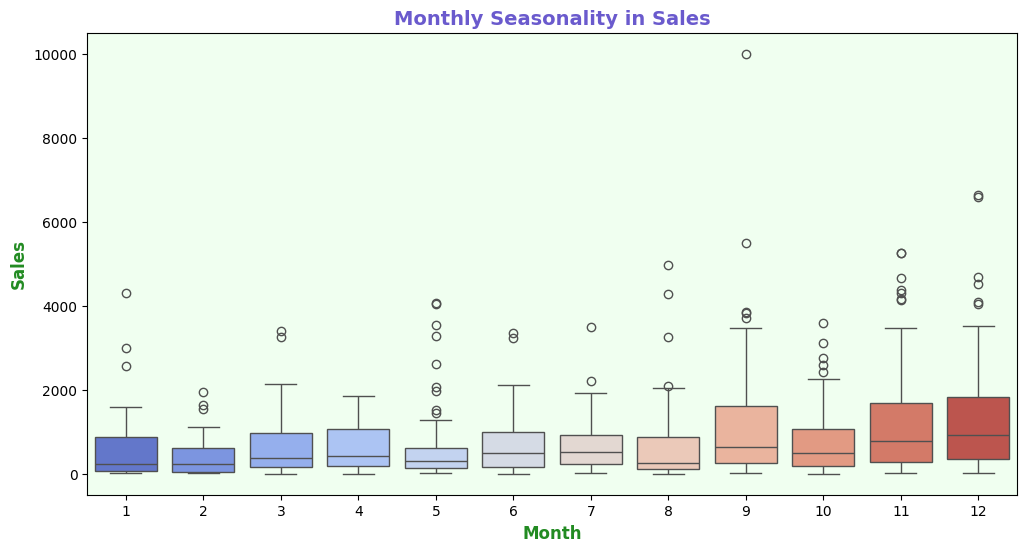

In [ ]:
# Boxplot by Month
df_sales['Month_Num'] = df_sales['Date'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sales, x='Month_Num', y='Sales', palette='coolwarm')
plt.title('Monthly Seasonality in Sales',fontsize = 14, fontweight = 'bold', color = 'slateblue')
plt.xlabel('Month',fontsize = 12, fontweight = 'bold', color = 'forestgreen')
plt.ylabel('Sales',fontsize = 12, fontweight = 'bold', color = 'forestgreen')
plt.gca().set_facecolor('#f0fff0')
plt.grid(False)
plt.show()

## **3.6. Heatmap of Sales by Year and Month:**
- Use heatmap to show the most of sales by year and month.

Pivot Table (Sales by Year and Month):
 Month          1          2           3           4           5           6   \
Year                                                                           
2014    6242.5250  1839.6580  14573.9560   7944.8370   6912.7870  13206.1256   
2015   11739.9416  3134.3740  12499.7830  10475.6985   9374.9505   7714.1790   
2016    7622.7430  3925.5510  12801.0920  13212.0900  15119.8350  13070.5720   
2017    5964.0320  6866.3374  10893.4448   9065.9581  16957.5582  19008.5867   

Month         7           8           9           10          11          12  
Year                                                                          
2014   10821.051   7320.3465  23816.4808  12304.2470  21564.8727  30645.9665  
2015   13674.420   9638.5922  26273.0230  12026.6235  30880.8325  23085.8192  
2016   13068.519  12483.2323  27262.8809  11872.5770  31783.6288  36678.7150  
2017   11813.022  15441.8740  29028.2060  21884.0682  37056.7150  31407.4668  


<Figure size 1200x600 with 0 Axes>

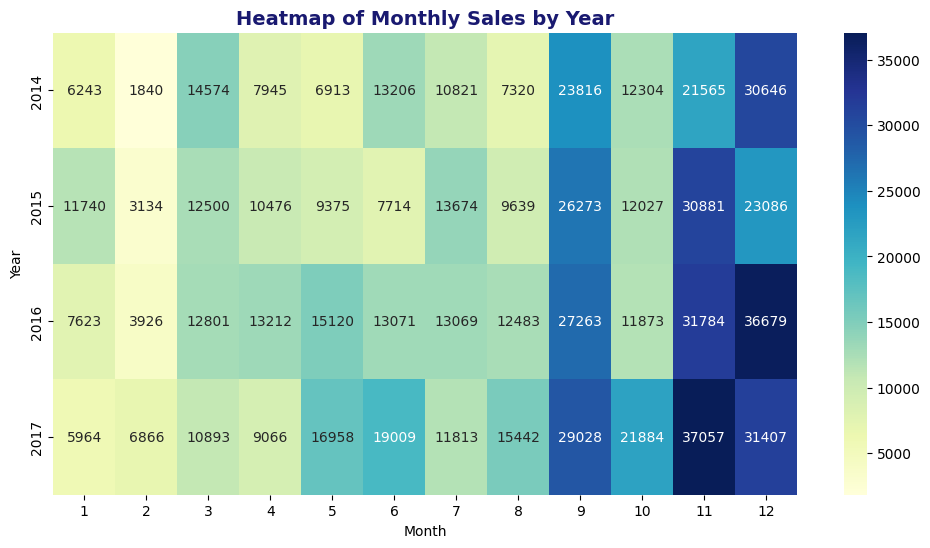

In [ ]:
# Heatmap of Sales by Year and Month
heatmap_data = df_sales.copy()
heatmap_data['Month'] = heatmap_data['Date'].dt.month
heatmap_data['Year'] = heatmap_data['Date'].dt.year
pivot_table = heatmap_data.pivot_table(values='Sales', index='Year', columns='Month', aggfunc='sum')
print("Pivot Table (Sales by Year and Month):\n", pivot_table)
plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of Monthly Sales by Year',fontsize = 14, fontweight = 'bold', color = 'midnightblue')
plt.grid(False)
plt.show()

## **3.7. Top Countries by Product Sales:**
- Countries by product sales: Which countries have the highest product sales?

Top 10 Countries by Sales:
          Country        Sales
0  United States  741999.7953


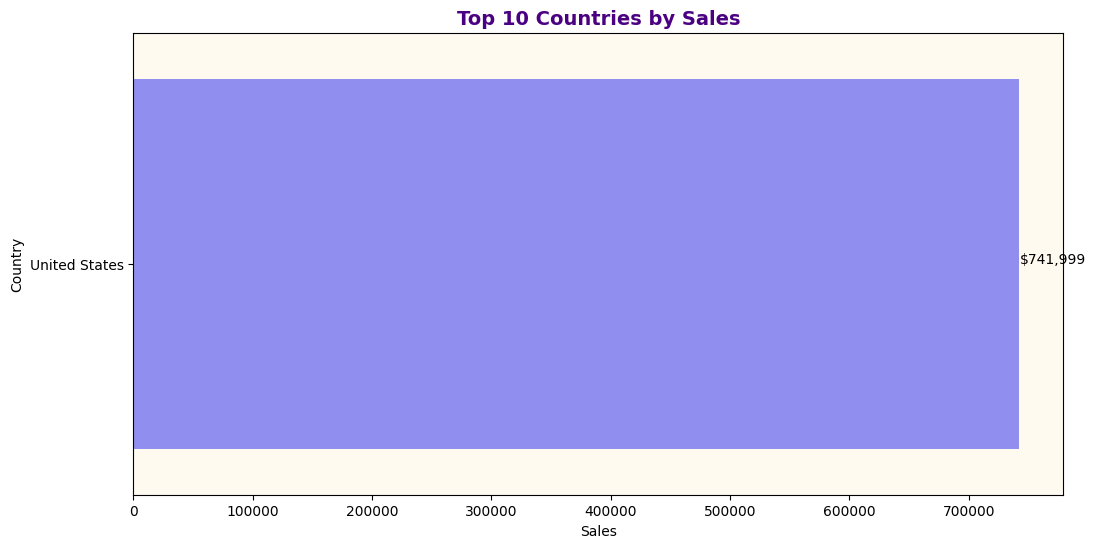

In [ ]:
# Top Countries by Product Sales
top_countries = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
print("Top 10 Countries by Sales:\n", top_countries)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Sales', y='Country', palette='cool')
plt.title('Top 10 Countries by Sales',fontsize = 14, fontweight = 'bold', color = 'indigo')
for i, v in enumerate(top_countries['Sales']):
    plt.text(v + 1000, i, f"${int(v):,}")
plt.gca().set_facecolor('#fffaf0')
plt.grid(False)
plt.show()

## **3.8. Top 10 Cities by Profit:**
- Cities by profit: Which cities generate the most profit?

Top 10 Cities by Profit:
             City     Profit
0        Seattle  6208.8182
1  New York City  5306.6915
2        Detroit  3332.6748
3    Los Angeles  3071.5913
4      Henderson  2239.9673
5  San Francisco  1491.3810
6      Milwaukee  1384.4513
7        Jackson  1243.5227
8          Tulsa  1137.7601
9      San Diego  1106.3502


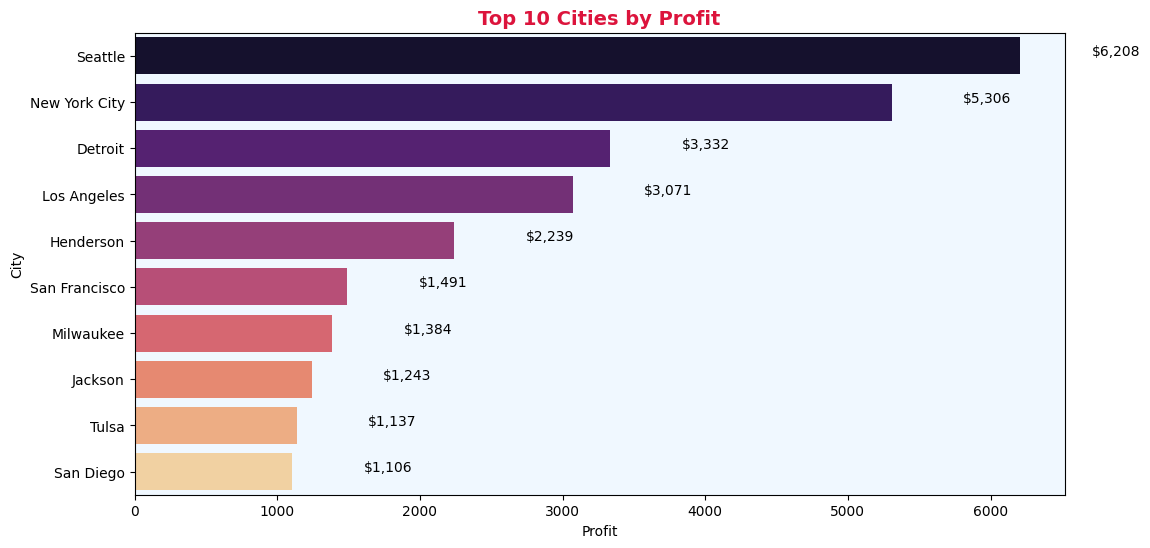

In [ ]:
# Cities by Profit
top_cities = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10).reset_index()
print("Top 10 Cities by Profit:\n", top_cities)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='Profit', y='City', palette='magma')
plt.title('Top 10 Cities by Profit',fontsize = 14, fontweight = 'bold', color = 'crimson')
for i, v in enumerate(top_cities['Profit']):
    plt.text(v + 500, i, f"${int(v):,}")
plt.gca().set_facecolor('#f0f8ff')
plt.grid(False)
plt.show()

## **3.9. Sales by Region:**
- Regions by sales: Which regions contribute the most to sales?

Sales by Region:
     Region        Sales
0     West  252612.7435
1     East  208291.2040
2  Central  163797.1638
3    South  117298.6840


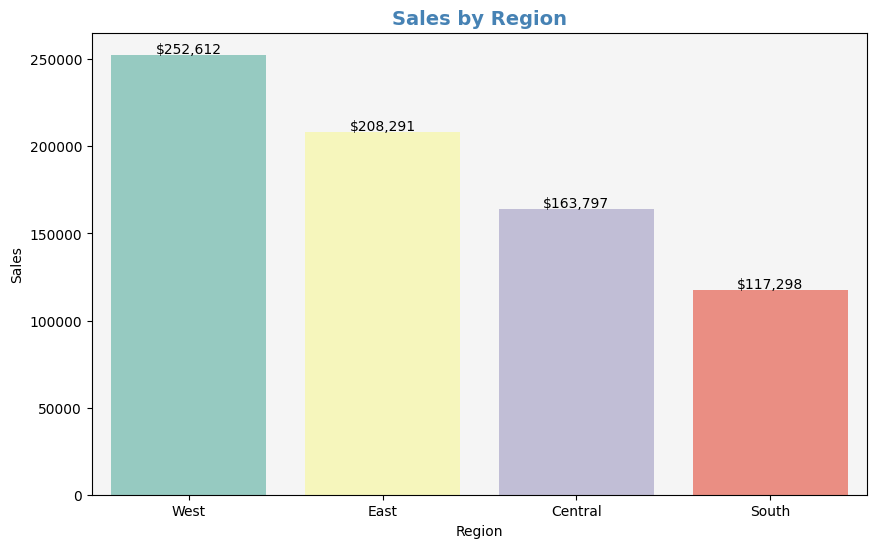

In [ ]:
# Regions by Sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()
print("Sales by Region:\n", region_sales)
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sales, x='Region', y='Sales', palette='Set3')
plt.title('Sales by Region',fontsize = 14, fontweight = 'bold', color = 'steelblue')
for i, v in enumerate(region_sales['Sales']):
    plt.text(i, v + 1000, f"${int(v):,}", ha='center')
plt.gca().set_facecolor('#f5f5f5')
plt.grid(False)
plt.show()

## **3.10. Regions by Profit:**
- Regions by profit: Which regions are the most profitable?

Profit by Region:
     Region      Profit
0     West  11504.9503
1    South   6771.2061
2     East   3046.1658
3  Central  -2871.0494


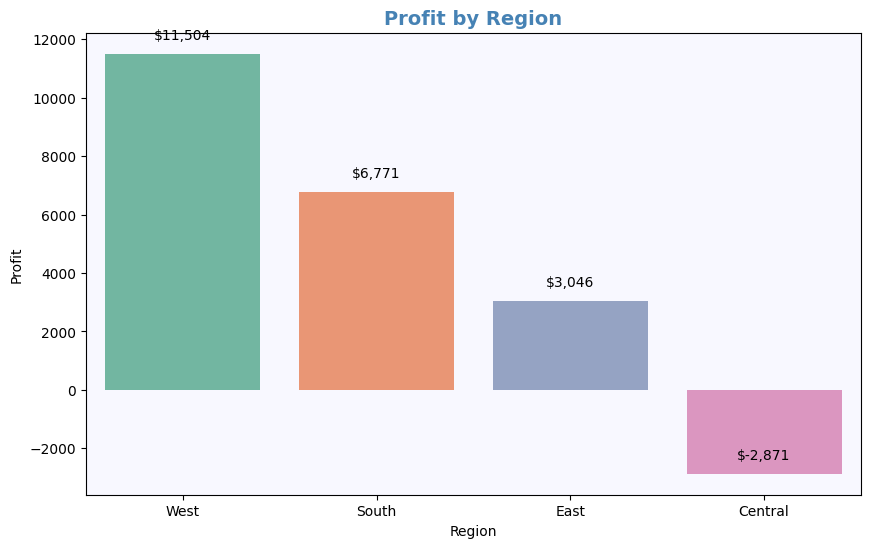

In [ ]:
# Regions by Profit
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False).reset_index()
print("Profit by Region:\n", region_profit)
plt.figure(figsize=(10, 6))
sns.barplot(data=region_profit, x='Region', y='Profit', palette='Set2')
plt.title('Profit by Region',fontsize = 14, fontweight = 'bold', color = 'steelblue')
for i, v in enumerate(region_profit['Profit']):
    plt.text(i, v + 500, f"${int(v):,}", ha='center')
plt.gca().set_facecolor('#f8f8ff')
plt.grid(False)
plt.show()


# **4. 📐Feature Engineering**
- I'll extract time-based features that might help machine learning models.

In [ ]:
df_ml = df_sales.copy()
df_ml['Day'] = df_ml['Date'].dt.day
df_ml['Month'] = df_ml['Date'].dt.month
df_ml['Year'] = df_ml['Date'].dt.year
df_ml['DayOfWeek'] = df_ml['Date'].dt.dayofweek
df_ml['WeekOfYear'] = df_ml['Date'].dt.isocalendar().week
df_ml['IsWeekend'] = df_ml['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
df_ml = df_ml.drop(['Date'], axis=1)


# **5. 🔀 Split the Data**

- Divide the data into two sets: a training set and a test set.
- The training set is what you use to teach the models, and the test set is what you use to see how well the models learned. Keep the most recent 6 months of sales for the test set.
- I'll keep the last 6 months (180 days)as a test set for time series forecasting.

In [ ]:
train = df_ml.iloc[:-180]
test = df_ml.iloc[-180:]

X_train = train.drop('Sales', axis=1)
y_train = train['Sales']
X_test = test.drop('Sales', axis=1)
y_test = test['Sales']

# **6. 🤖 Choose a Model**
- **Random Forest:**  A model that combines many decision trees for prediction.
- **XGBoost:** A more advanced version of decision tree models.



# **7. 🏋️ Train the Model**

In [ ]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


In [ ]:
# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# **Time Series Forecasting Models**
-  **Exponential Smoothing(Holt-Winters):** A classic model that smooths out the data to forecast future values, taking into account trends and seasonality.

In [ ]:
# Exponential Smoothing(Holt-Winters)
hw_model = ExponentialSmoothing(train['Sales'], seasonal='add', seasonal_periods=30).fit()
hw_preds = hw_model.forecast(len(test))


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


- **ARIMA:**  A more sophisticated model that uses past values and errors to make predictions.

In [ ]:
# ARIMA
arima_model = ARIMA(train['Sales'], order=(5,1,0))
arima_fit = arima_model.fit()
arima_preds = arima_fit.forecast(steps=len(test))


# **8. 📈 Evaluation & Compare the Model**

- Define a function to evaluate:
  - **MAE (Mean Absolute Error):** The average size of the errors.
  - **RMSE (Root Mean Squared Error):** Similar to MAE, but gives more weight to larger errors.
  - **R-squared:** How well the model explains the variation in the sales data.

In [ ]:
# Evaluation & Compare Model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R^2 Score: {r2:.2f}\n")
    return mae, rmse, r2

# Evaluate All Models
results = {}
results['Random Forest'] = evaluate_model(y_test, rf_preds, 'Random Forest')
results['XGBoost'] = evaluate_model(y_test, xgb_preds, 'XGBoost')
results['Exponential Smoothing'] = evaluate_model(y_test, hw_preds, 'Holt-Winters')
results['ARIMA'] = evaluate_model(y_test, arima_preds, 'ARIMA')


Random Forest Performance:
MAE: 750.33
RMSE: 1080.40
R^2 Score: -0.06

XGBoost Performance:
MAE: 772.65
RMSE: 1130.50
R^2 Score: -0.16

Holt-Winters Performance:
MAE: 718.16
RMSE: 1109.95
R^2 Score: -0.12

ARIMA Performance:
MAE: 705.87
RMSE: 1123.21
R^2 Score: -0.15



## **Forecast Visualization**
- Create a plot that shows the actual sales compared to the predictions made by each model. This helps you see how well each model is performing visually.

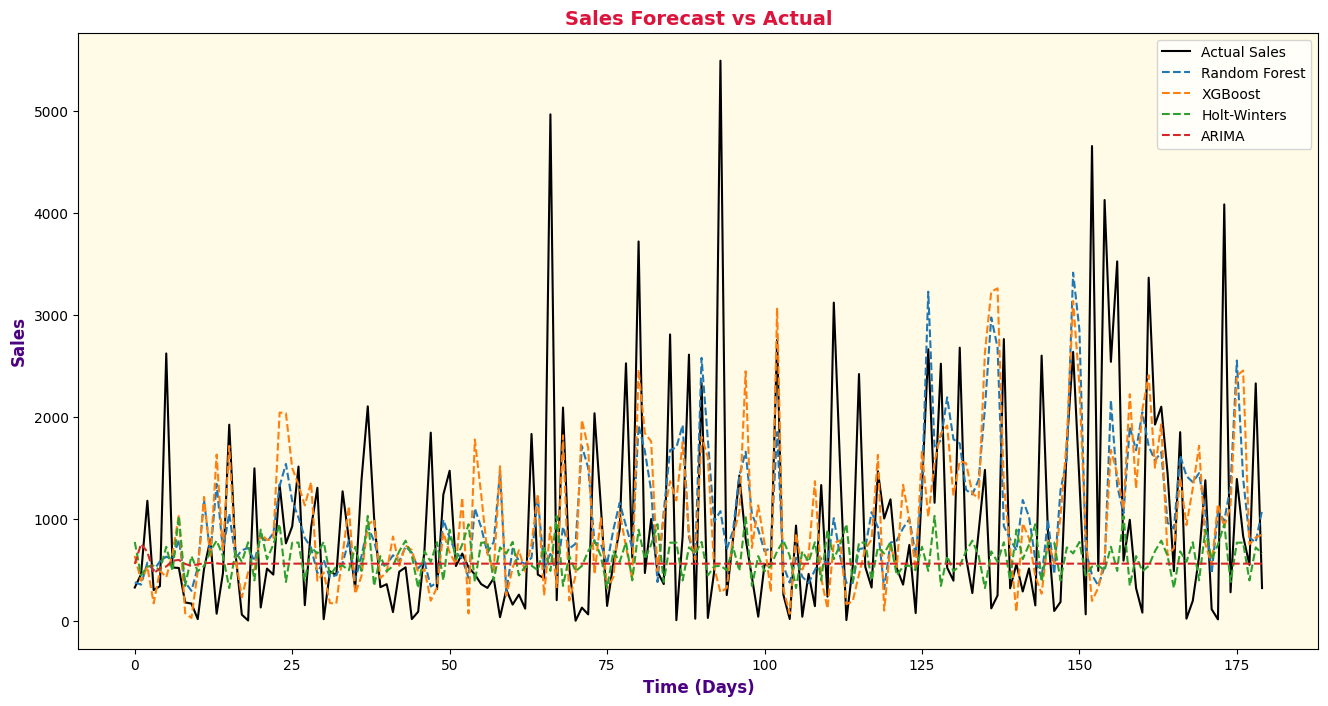

In [ ]:
# Forecast Visualization
plt.figure(figsize=(16, 8))
plt.plot(y_test.values, label='Actual Sales', color='black')
plt.plot(rf_preds, label='Random Forest', linestyle='--')
plt.plot(xgb_preds, label='XGBoost', linestyle='--')
plt.plot(hw_preds.values, label='Holt-Winters', linestyle='--')
plt.plot(arima_preds.values, label='ARIMA', linestyle='--')
plt.title('Sales Forecast vs Actual',fontsize = 14, fontweight = 'bold', color = 'crimson')
plt.xlabel('Time (Days)',fontsize = 12, fontweight = 'bold', color = 'indigo')
plt.ylabel('Sales',fontsize = 12, fontweight = 'bold', color = 'indigo')
plt.legend()
plt.gca().set_facecolor('#fffbe6')
plt.grid(False)
plt.show()


## **Compare Model Metrics** (Bar Chart)
- Finally, create a bar chart that compares the different metrics (MAE, RMSE, R-squared) for each model. This makes it easy to see which model performed the best overall.

Model Evaluation Metrics:
                    Model         MAE         RMSE        R2
0          Random Forest  750.329596  1080.401741 -0.063457
1                XGBoost  772.654740  1130.496724 -0.164362
2  Exponential Smoothing  718.162012  1109.952500 -0.122427
3                  ARIMA  705.868183  1123.205739 -0.149392


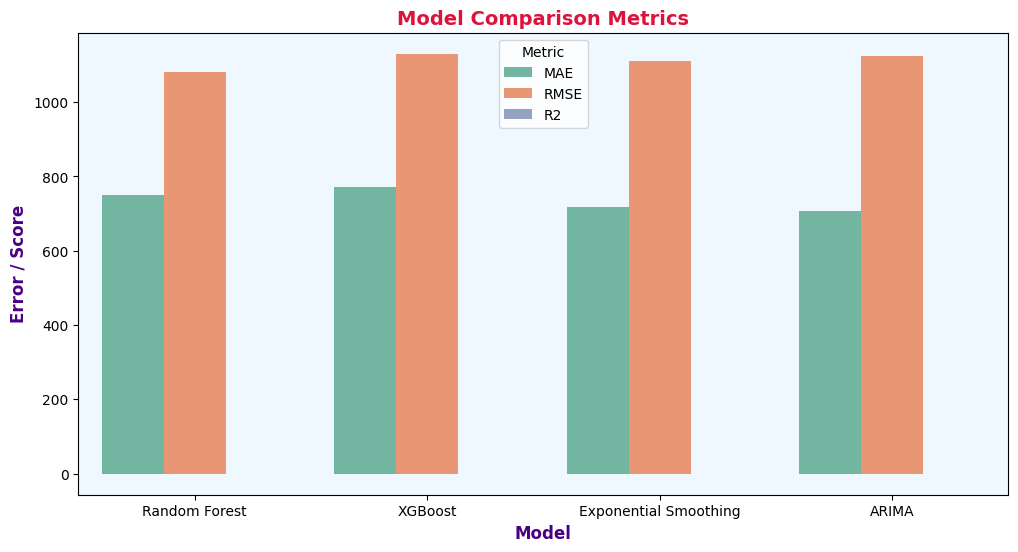

In [ ]:
# Compare Model Metrics (Bar Chart)
metrics_df = pd.DataFrame(results, index=['MAE', 'RMSE', 'R2']).T.reset_index()
metrics_df.columns = ['Model', 'MAE', 'RMSE', 'R2']
print("Model Evaluation Metrics:\n", metrics_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_df.melt(id_vars='Model'), x='Model', y='value', hue='variable', palette='Set2')
plt.title('Model Comparison Metrics',fontsize = 14, fontweight = 'bold', color = 'crimson')
plt.ylabel('Error / Score',fontsize = 12, fontweight = 'bold', color = 'indigo')
plt.xlabel('Model',fontsize = 12, fontweight = 'bold', color = 'indigo')
plt.legend(title='Metric')
plt.gca().set_facecolor('#f0f8ff')
plt.grid(False)
plt.show()